# Ôn tập

## North Carolina births

Bộ dữ liệu `nc` chứa thông tin các ca sinh của các sản phụ tại bang North Carolina năm 2004. Chúng ta sẽ sử dụng bộ dữ liệu này để tìm hiểu về mối liên quan giữa mẹ và em bé

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.linear_model import LinearRegression
from scipy import stats

## EDA

Đọc dữ liệu `nc`

In [2]:
df = pd.read_csv('nc.csv')

In [3]:
df.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


Thông tin các thuộc tính

| variable         | description |
| ---------------- | ------------|
| `fage`           | Tuổi cha. |
| `mage`           | tuổi mẹ. |
| `mature`         | Xếp loại trưởng thành của mẹ. |
| `weeks`          | Số tuần thai kỳ. |
| `premie`         | Phân loại ca sinh (thiếu tháng hay đủ tháng). |
| `visits`         | Số lần thăm khám trong suốt thời gian thai kỳ |
| `marital`        | Tình trạng hôn nhân của sản phụ. |
| `gained`         | Số cân nặng tăng lên của sản phụ(đơn vị pounds). |
| `weight`         | Trọng lượng của em bé lúc mới sinh (đơn vị pounds). |
| `lowbirthweight` | Phân loại em bé sinh thiếu ký hay đủ ký. |
| `gender`         | Giới tính của bé. |
| `habit`          | Thói quen hút thuốc của mẹ (hút thuốc hay không hút thuốc) |
| `whitemom`       | Phân loại màu da của sản phụ (da trắng hay không da trắng). |

### 1, Có bao nhiêu trường hợp trong bộ dữ liệu?

In [4]:
# Lấy số trường hợp trong bộ dữ liệu
num_cases = df.shape[0]
print(f"Số trường hợp trong bộ dữ liệu: {num_cases}")

Số trường hợp trong bộ dữ liệu: 1000


### 2, Sử dụng hai hàm `describe()` và `info()` để tóm tắt dữ liệu

In [5]:
# Thống kê mô tả
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [6]:
# Kiểm tra thông tin của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


### 3, Tìm hiểu các thuộc tính

a, Cho biết thuộc tính nào là định tính, thuộc tính nào định lượng. Với mỗi loại thuộc tính bạn hãy lựa chọn đồ thị phù hợp để trực quan. Cho biết thuộc tính đó có ngoại lệ (outliers không?)


b, Theo bạn có mỗi liên hệ nào giữa thói quen hút thuốc của mẹ và trọng lượng em bé hay không?. Hãy vẽ hình để khẳng định ý kiến của bạn

#### Câu a

In [7]:
# Kiểm tra kiểu dữ liệu của dataset
df.dtypes

fage              float64
mage                int64
mature             object
weeks             float64
premie             object
visits            float64
marital            object
gained            float64
weight            float64
lowbirthweight     object
gender             object
habit              object
whitemom           object
dtype: object

In [8]:
# Phân loại dữ liệu
qualitative_attributes = df.select_dtypes(include=['object']).columns
quantitative_attributes = df.select_dtypes(include=['int64', 'float64']).columns

In [9]:
# Hiển thị kết quả
print("Thuộc tính phân loại: \n", qualitative_attributes)
print("\nThuộc tính định lượng: \n", quantitative_attributes)

Thuộc tính phân loại: 
 Index(['mature', 'premie', 'marital', 'lowbirthweight', 'gender', 'habit',
       'whitemom'],
      dtype='object')

Thuộc tính định lượng: 
 Index(['fage', 'mage', 'weeks', 'visits', 'gained', 'weight'], dtype='object')


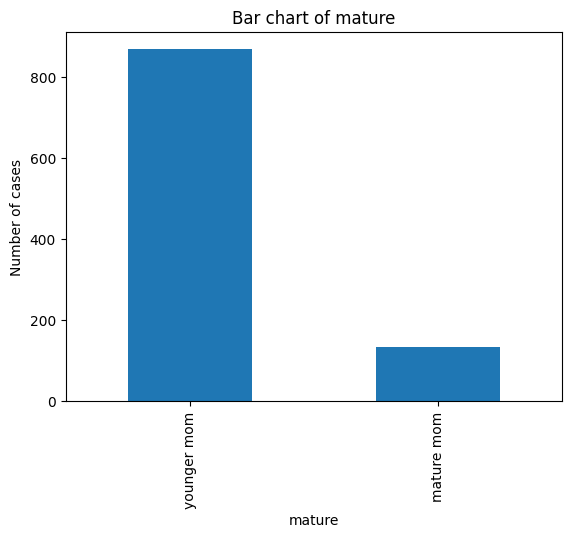

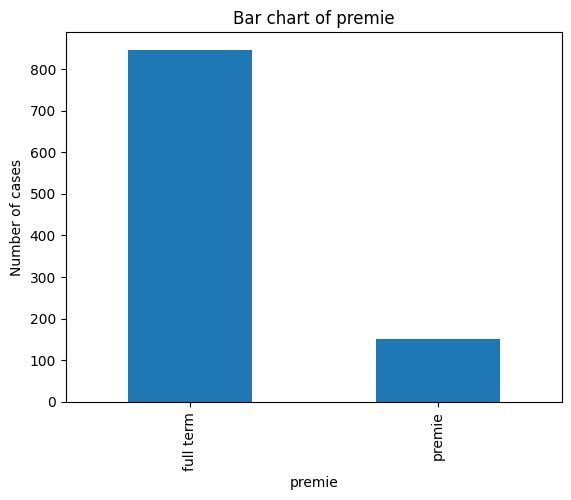

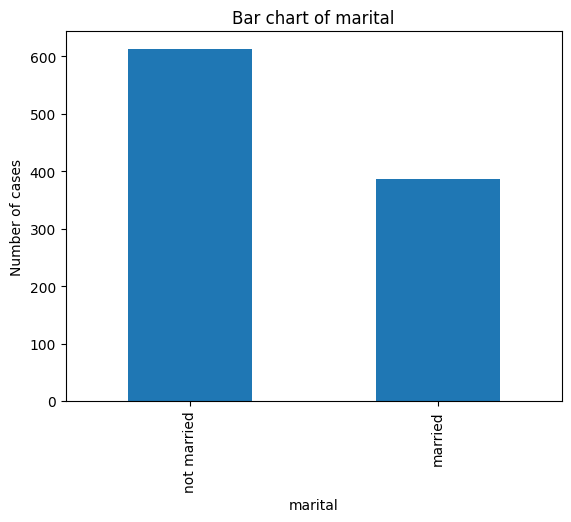

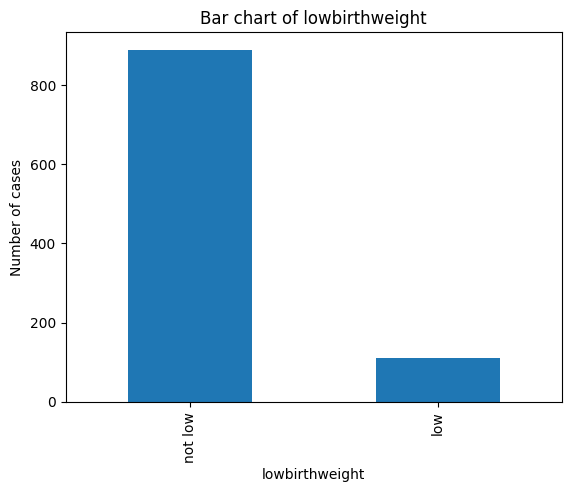

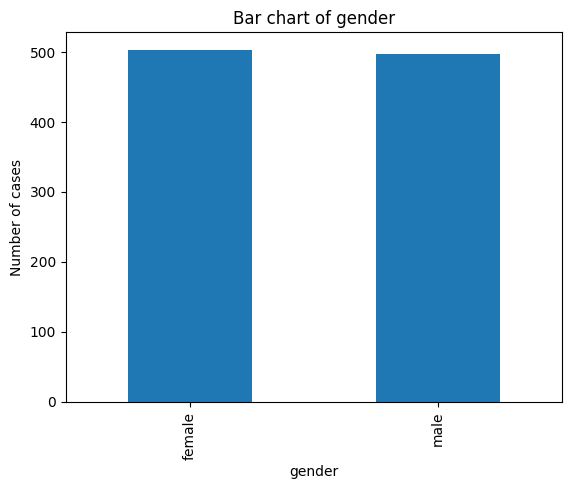

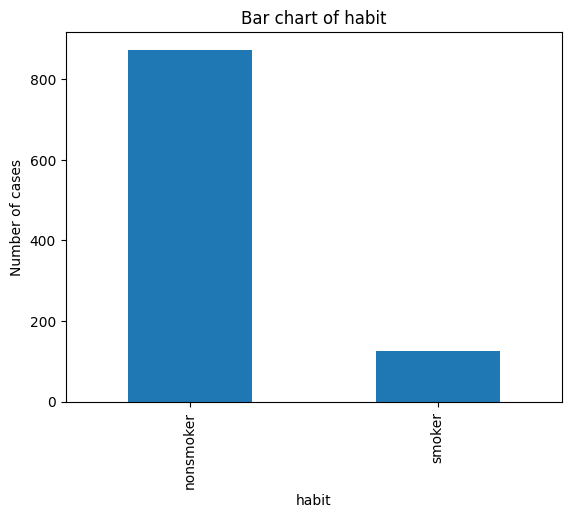

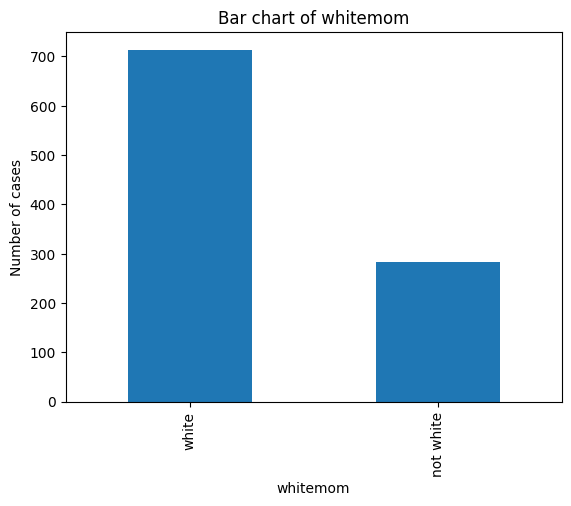

In [10]:
# Vẽ biểu đồ cho thuộc tính định tính
for attribute in qualitative_attributes:
    attribute_counts = df[attribute].value_counts()
    attribute_counts.plot(kind='bar')
    plt.xlabel(attribute)
    plt.ylabel('Number of cases')
    plt.title(f'Bar chart of {attribute}')
    plt.show()

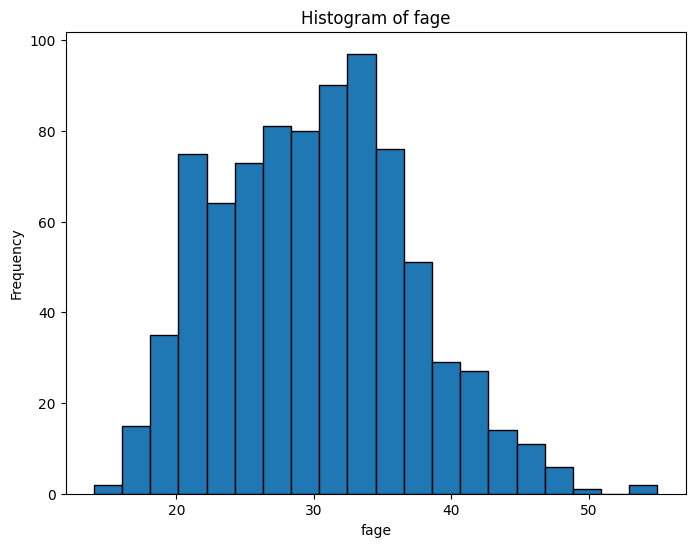

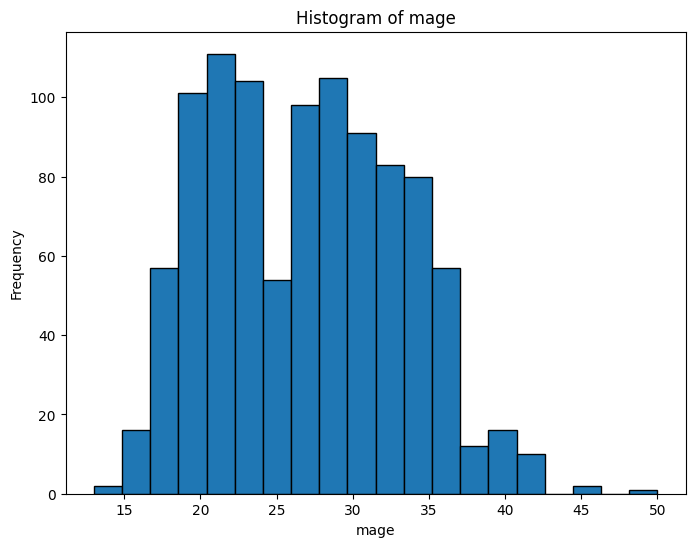

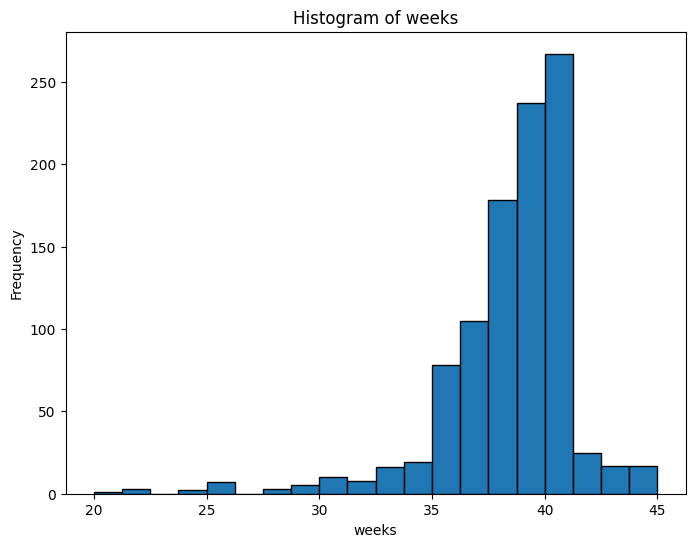

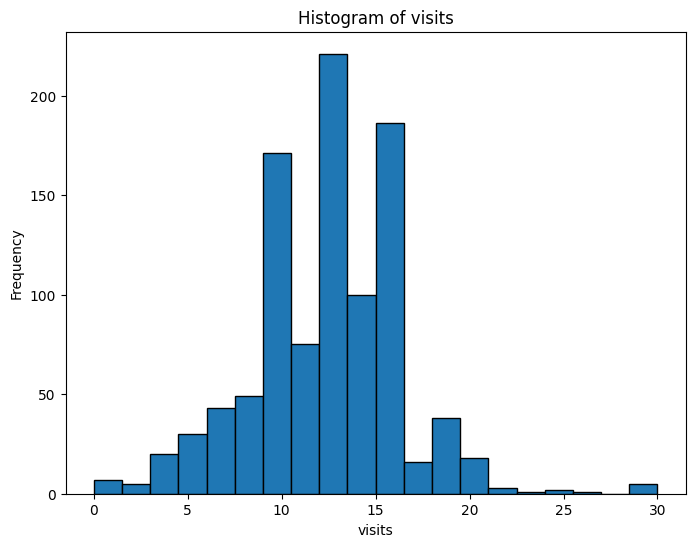

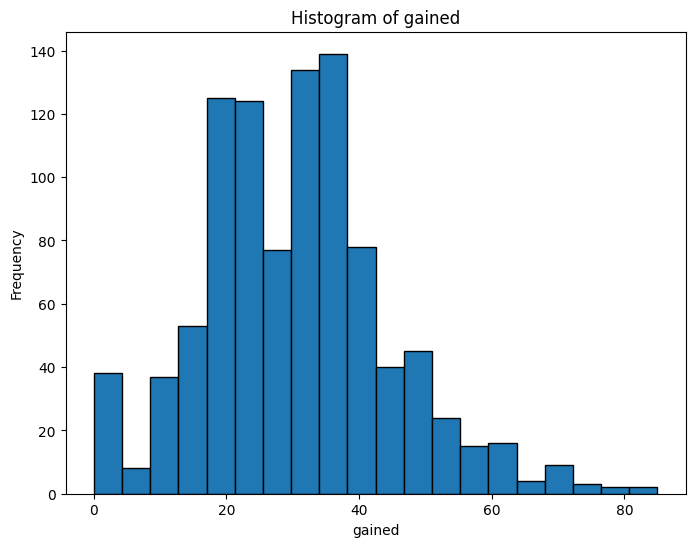

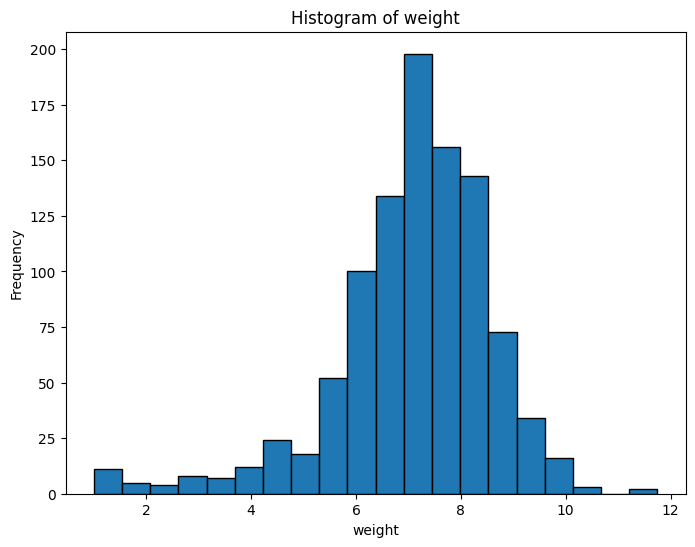

In [11]:
# Vẽ biểu đồ cho từng thuộc tính định lượng
for attr in quantitative_attributes:
    plt.figure(figsize=(8, 6))
    plt.hist(df[attr].dropna(), bins=20, edgecolor='black')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {attr}')
    plt.show()

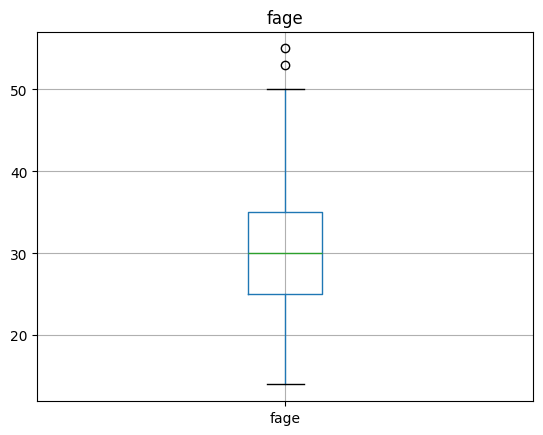

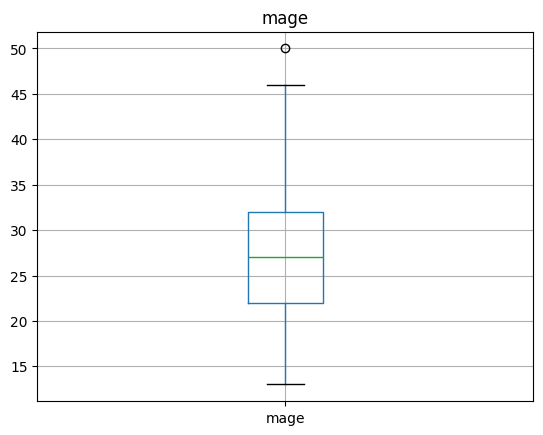

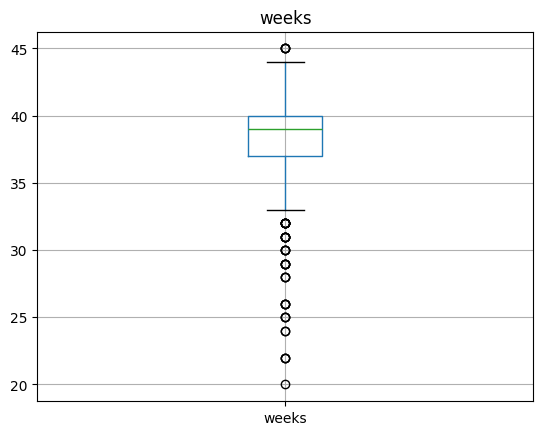

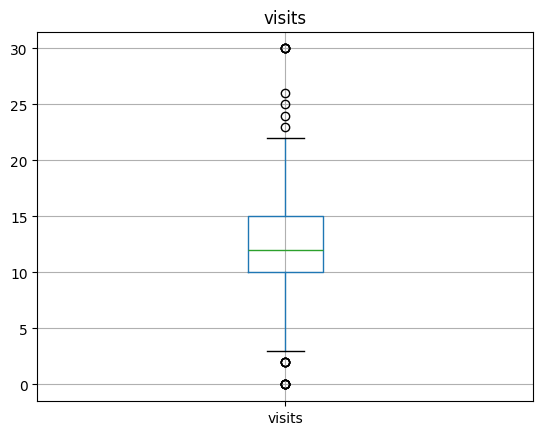

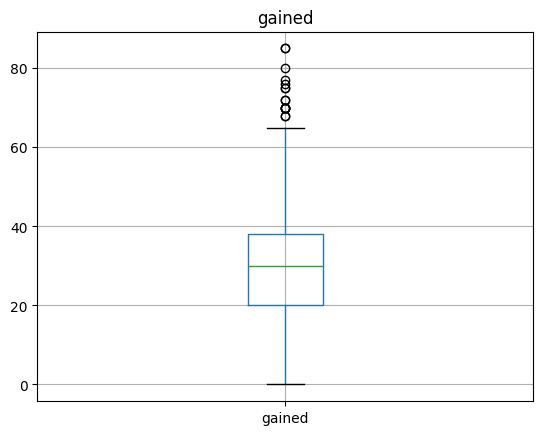

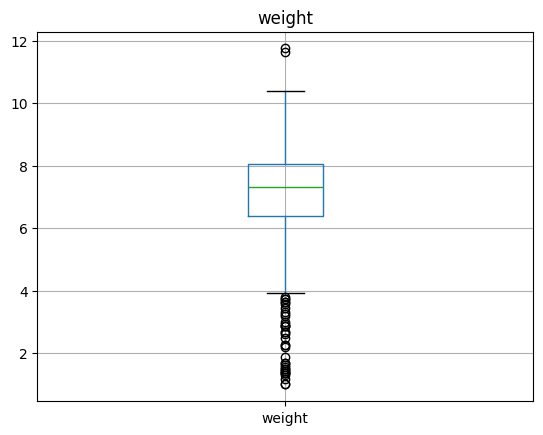

In [12]:
# Vẽ biểu đồ hộp (boxplot) cho thuộc tính định lượng để phát hiện ngoại lệ
for attribute in quantitative_attributes:
    df.boxplot(column=attribute)
    plt.title(attribute)
    plt.show()

#### Câu b

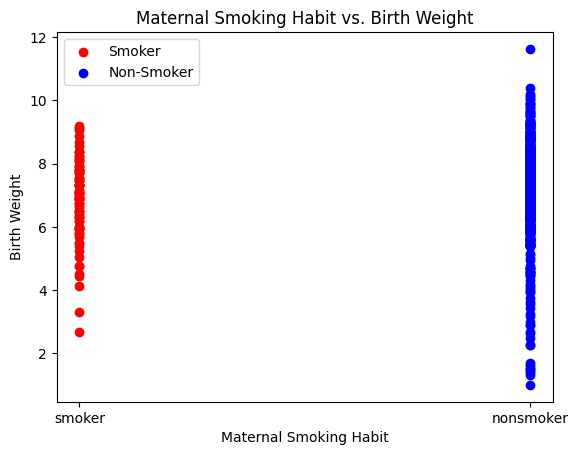

In [13]:
# Loại bỏ các dòng có giá trị thiếu (NA)
data = df.dropna()

# Trực quan hóa thói quen hút thuốc của mẹ và trọng lượng em bé
habit_smoker = data[data['habit'] == 'smoker']
habit_nonsmoker = data[data['habit'] == 'nonsmoker']

# Vẽ scatter plot để trực quan hóa mối quan hệ giữa thói quen hút thuốc của người mẹ và trọng lượng em bé
plt.scatter(habit_smoker['habit'], habit_smoker['weight'], color='red', label='Smoker')
plt.scatter(habit_nonsmoker['habit'], habit_nonsmoker['weight'], color='blue', label='Non-Smoker')

plt.xlabel('Maternal Smoking Habit')
plt.ylabel('Birth Weight')
plt.title('Maternal Smoking Habit vs. Birth Weight')
plt.legend()

plt.show()

**Nhận xét:**

Dựa trên biểu đồ, có thể thấy rằng trẻ em sinh ra từ mẹ hút thuốc có xu hướng có trọng lượng thấp hơn so với trẻ em sinh ra từ mẹ không hút thuốc. Điều này cho thấy có mối liên hệ tiêu cực giữa thói quen hút thuốc của người mẹ và trọng lượng em bé.

## SUY DIỄN THỐNG KÊ

### 4, Xây dựng khoảng tin cậy 95% cho số tuần mang thai của sản phụ

Mean: 38.33
Standard Deviation: 2.93
Confidence Interval (95%): 32.59 - 44.08


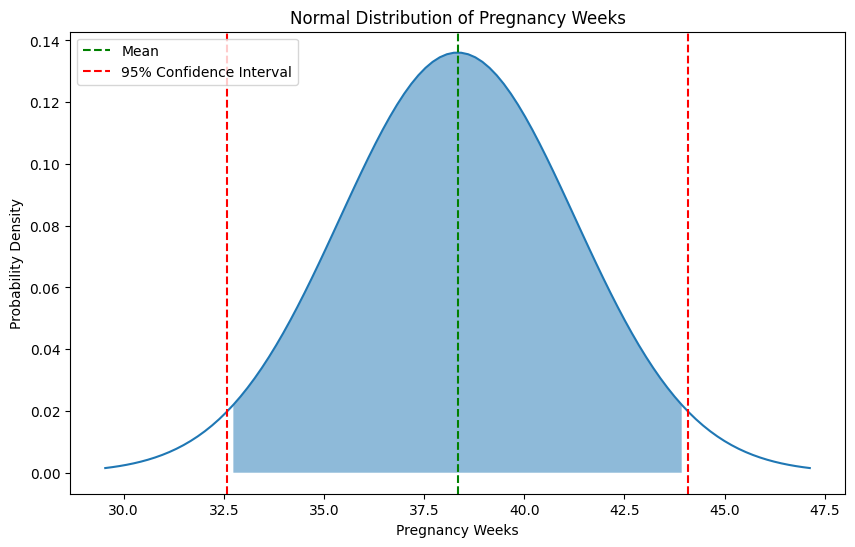

In [14]:
# Lấy số tuần mang thai
pregnancy_weeks = df["weeks"]

# Loại bỏ các giá trị NA (không có dữ liệu) trong cột 'weeks'
pregnancy_weeks = pregnancy_weeks.dropna()

# Tính giá trị trung bình và độ lệch chuẩn của số tuần mang thai
mean = pregnancy_weeks.mean()
std = pregnancy_weeks.std()

# Tính giá trị của z-score cho khoảng tin cậy 95%
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Tính khoảng tin cậy dựa trên z-score
margin_of_error = z_score * std
# confidence_interval = (mean - margin_of_error, mean + margin_of_error)
confidence_interval = stats.norm.interval(0.95, loc=mean, scale=std)

# Hiển thị kết quả
# print(f"Trung bình số tuần mang thai: {mean}")
# print(f"Độ lệch chuẩn số tuần mang thai: {std}")
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(std))
# print(f"95% Confidence Interval: {confidence_interval}")
print("Confidence Interval (95%): {:.2f} - {:.2f}".format(confidence_interval[0], confidence_interval[1]))

# Vẽ biểu đồ phân phối chuẩn
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = stats.norm.pdf(x, loc=mean, scale=std)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=((x >= confidence_interval[0]) & (x <= confidence_interval[1])), alpha=0.5)
plt.xlabel('Pregnancy Weeks')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Pregnancy Weeks')
plt.axvline(mean, color='green', linestyle='--', label='Mean')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='95% Confidence Interval')
plt.axvline(confidence_interval[1], color='red', linestyle='--')
plt.legend(loc='upper left')
plt.show()

**Nhận xét:**

- Dựa vào biểu đồ phân phối chuẩn, ta có thể thấy số tuần mang thai của sản phụ có phân bố xấp xỉ chuẩn với trung bình là 38.33 tuần và độ lệch chuẩn là 2,93 tuần. 

- Điều này cho thấy rằng số tuần mang thai của sản phụ có thể dao động từ 32.59 đến 44.08 tuần với mức tin cậy 95%.

### 5, Xây dựng khoảng tin cậy 90% cho số tuần mang thai của sản phụ

Mean: 38.33
Standard Deviation: 2.93
Confidence Interval (90%): 33.51 - 43.16


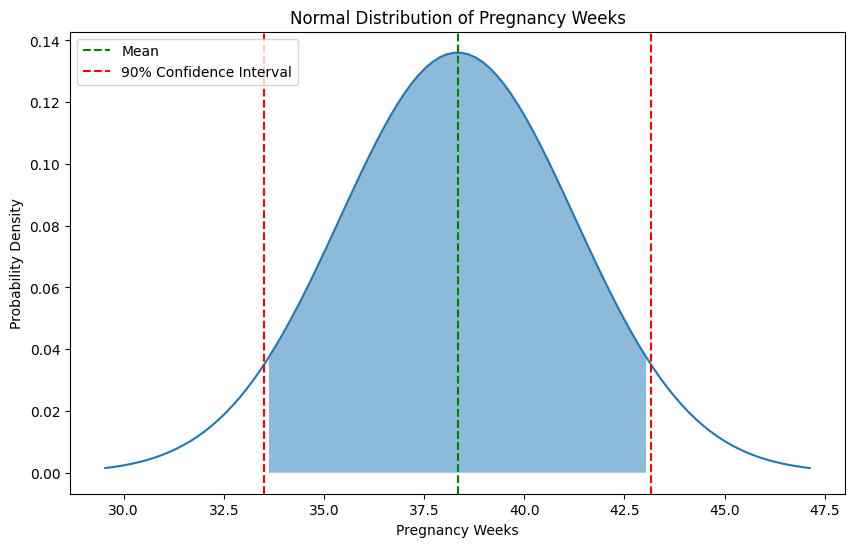

In [15]:
# Lấy số tuần mang thai
pregnancy_weeks = df["weeks"]

# Loại bỏ các giá trị NA (không có dữ liệu) trong cột 'weeks'
pregnancy_weeks = pregnancy_weeks.dropna()

# Tính giá trị trung bình và độ lệch chuẩn của số tuần mang thai
mean = pregnancy_weeks.mean()
std = pregnancy_weeks.std()

# Tính giá trị của z-score cho khoảng tin cậy 95%
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Tính khoảng tin cậy dựa trên z-score
margin_of_error = z_score * std
# confidence_interval = (mean - margin_of_error, mean + margin_of_error)
confidence_interval = stats.norm.interval(0.9, loc=mean, scale=std)

# Hiển thị kết quả
# print(f"Trung bình số tuần mang thai: {mean}")
# print(f"Độ lệch chuẩn số tuần mang thai: {std}")
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(std))
# print(f"95% Confidence Interval: {confidence_interval}")
print("Confidence Interval (90%): {:.2f} - {:.2f}".format(confidence_interval[0], confidence_interval[1]))

# Vẽ biểu đồ phân phối chuẩn
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
y = stats.norm.pdf(x, loc=mean, scale=std)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=((x >= confidence_interval[0]) & (x <= confidence_interval[1])), alpha=0.5)
plt.xlabel('Pregnancy Weeks')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Pregnancy Weeks')
plt.axvline(mean, color='green', linestyle='--', label='Mean')
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='90% Confidence Interval')
plt.axvline(confidence_interval[1], color='red', linestyle='--')
plt.legend(loc='upper left')
plt.show()

**Nhận xét:**

- Dựa vào biểu đồ phân phối chuẩn, ta có thể thấy số tuần mang thai của sản phụ có phân bố xấp xỉ chuẩn với trung bình là 38.33 tuần và độ lệch chuẩn là 2,93 tuần. 

- Điều này cho thấy rằng số tuần mang thai của sản phụ có thể dao động từ 33.51 đến 43.16 tuần với mức tin cậy 90%.

### 6, Dựa trên bộ dữ liệu bạn hãy cho biết tiêu chí để phân biệt các giá trị của các biến phân loại:
- sự trưởng thành của mẹ
- một ca sinh non
- bé sinh đủ cân


In [16]:
# Analyze categorical variables
print("Analyze qualitative variables: ")

# mother's maturity
print("\nmother's maturity: ")
print(df["mature"].value_counts())

# premature birth
print("\npremature birth: ")
print(df["premie"].value_counts())

# low birth weight
print("\nlow birth weight: ")
print(df["lowbirthweight"].value_counts())

Analyze qualitative variables: 

mother's maturity: 
mature
younger mom    867
mature mom     133
Name: count, dtype: int64

premature birth: 
premie
full term    846
premie       152
Name: count, dtype: int64

low birth weight: 
lowbirthweight
not low    889
low        111
Name: count, dtype: int64


### 7, Khảo sát mối tương quan tuyến tính

Dựa trên bộ dữ liệu bạn hãy cho biết có hai biến định lượng nào có mối tương quan với nhau hay không?

*Gợi ý: sử dụng `pairplots` hoặc `heatmap` trong seaborn hoặc tính hệ số tương quan giữa các thuộc tính*

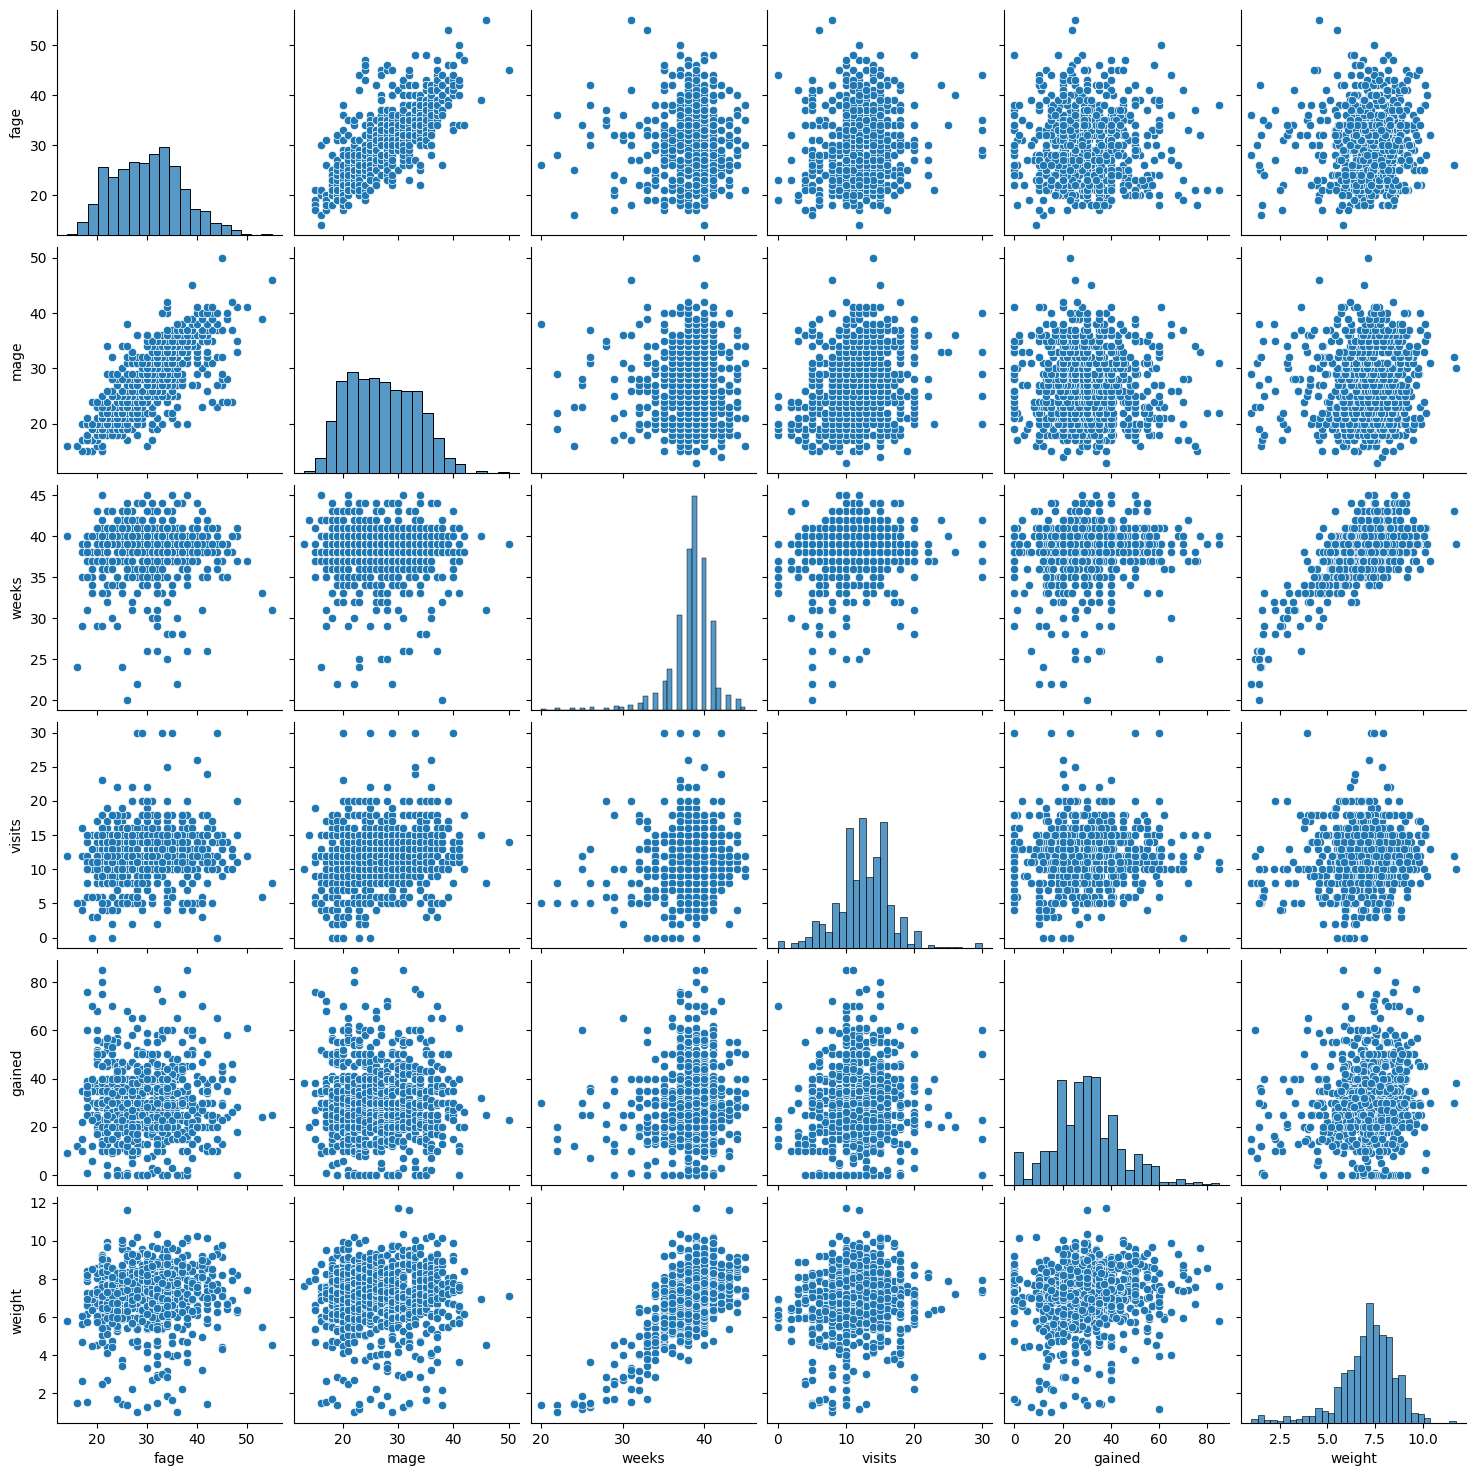

In [17]:
# Vẽ pairplot cho các thuộc tính định lượng
sns.pairplot(df[quantitative_attributes])
plt.show()

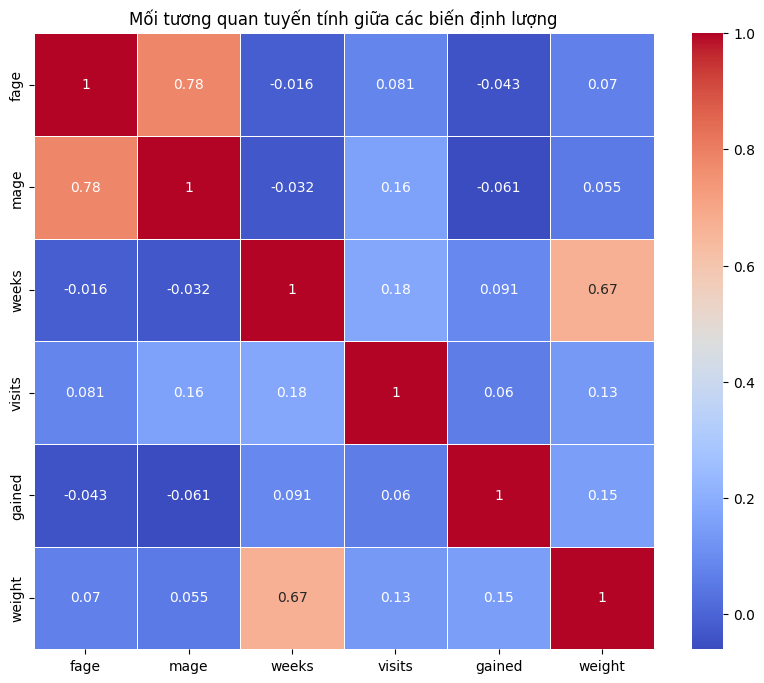

In [18]:
# Tạo ma trận tương quan
correlation_matrix = df[quantitative_attributes].corr()

# Vẽ biểu đồ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mối tương quan tuyến tính giữa các biến định lượng')
plt.show()

In [19]:
# Tính hệ số tương quan giữa các thuộc tính định lượng
quantitative_attributes_list = list(quantitative_attributes)
for i in range(len(quantitative_attributes_list)):
    for j in range(i + 1, len(quantitative_attributes_list)):
        correlation_coefficient = df[quantitative_attributes_list[i]].corr(df[quantitative_attributes_list[j]])
        print(f"{quantitative_attributes_list[i]} - {quantitative_attributes_list[j]}: {correlation_coefficient:.3f}")


fage - mage: 0.781
fage - weeks: -0.016
fage - visits: 0.081
fage - gained: -0.043
fage - weight: 0.070
mage - weeks: -0.032
mage - visits: 0.161
mage - gained: -0.061
mage - weight: 0.055
weeks - visits: 0.176
weeks - gained: 0.091
weeks - weight: 0.670
visits - gained: 0.060
visits - weight: 0.135
gained - weight: 0.154


---
